# 0. Import des modules

In [1]:
# pour créer des graphes
%matplotlib inline
import matplotlib.pyplot as plt

# pour générer les aléas
import numpy as np

# pour gérer des tables de données
import pandas as pd

# pour faire des graphes statistiques
import seaborn as sns
sns.set()

# 1. Régression simple

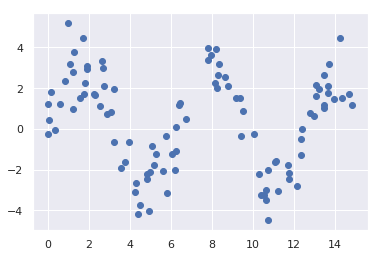

In [16]:
x = np.random.uniform(0, 15, size=100)
y = 3 * np.sin(x) + np.random.normal(size=len(x))

plt.scatter(x, y)

In [17]:
from sklearn.linear_model import LinearRegression

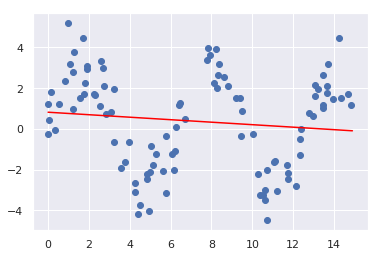

In [22]:
X_train = np.array(x).reshape(-1, 1)
y_train = y

X_test = np.arange(0, 15, 0.1).reshape(-1, 1)

reg = LinearRegression()

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, color='red')

In [31]:
from sklearn.neighbors import KNeighborsRegressor

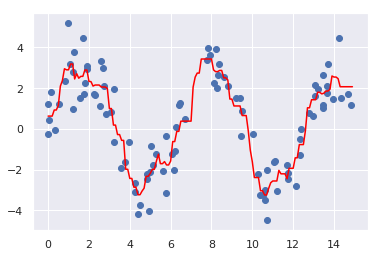

In [40]:
reg = KNeighborsRegressor()

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, color='red')

In [23]:
from sklearn.svm import SVR

/home/girardea/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


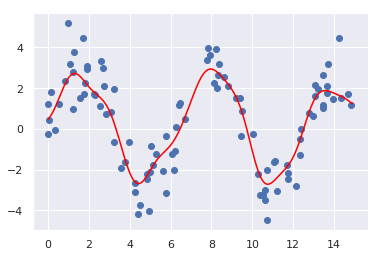

In [45]:
reg = SVR()

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, color='red')

## 1.2. Score

In [52]:
from sklearn.model_selection import train_test_split

In [46]:
from sklearn.metrics import r2_score

In [63]:
for reg in [LinearRegression(), KNeighborsRegressor(), SVR()]:
    scores = []
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(np.array(x).reshape(-1, 1), y,
                                                            test_size=0.3)
        
        reg.fit(X_train, y_train)

        scores.append(r2_score(y_test, reg.predict(X_test)))
    
    moy = np.mean(scores)
    std = np.std(scores)
    
    print(f"R2-score={moy:.2f} +/- {2*std:.2f} (95% IC)")

R2-score=-0.04 +/- 0.13 (95% IC)
R2-score=0.74 +/- 0.12 (95% IC)
R2-score=0.74 +/- 0.10 (95% IC)


/home/girardea/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/girardea/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/girardea/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/girardea/anaconda3/lib/python3.6/site-packa

# 2. Jeu de données réel : immobilier

In [64]:
df_train = pd.read_csv('../tutoriels/data/house-prices-advanced-regression-techniques/train.csv')

df_train.info()

df_train.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
98,99,30,RL,85.0,10625,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,400,5,2010,COD,Abnorml,83000
717,718,20,RL,80.0,10000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,11,2008,WD,Normal,157000
75,76,180,RM,21.0,1596,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,11,2009,WD,Normal,91000
613,614,20,RL,70.0,8402,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2007,New,Partial,147000
583,584,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,325000


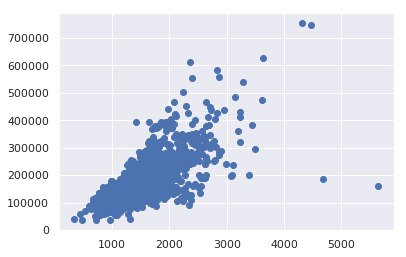

In [66]:
plt.scatter(df_train['GrLivArea'], df_train['SalePrice'])

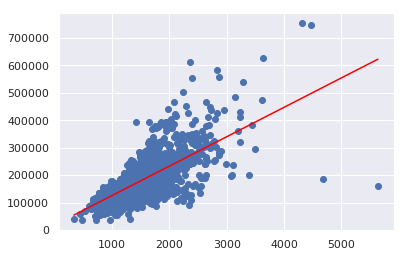

In [69]:
X = df_train[['GrLivArea']]
y = df_train['SalePrice']

reg = LinearRegression()

reg.fit(X, y)

X_new = np.arange(df_train['GrLivArea'].min(), df_train['GrLivArea'].max(), step=100).reshape(-1, 1)
y_pred = reg.predict(X_new)

plt.scatter(X, y)
plt.plot(X_new, y_pred, color='red')

In [65]:
from sklearn.metrics import mean_squared_log_error

In [71]:
np.sqrt(mean_squared_log_error(y, reg.predict(X)))

0.27557491699403447